#### Import Modules, Packages and Third Party Libraries

In [1]:
# Magic statements.
%matplotlib inline

# Import graph libraries.
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

# Import main modules, packages, and third party libraries.
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

# Import scikit-learn classes: datasets.
from sklearn.datasets import load_digits

# Import scikit-learn classes: preprocessing step utility functions.
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA # Unsupervised Machine Learning tasks: feature reduction, dimensionality reduction
from sklearn.mixture import GaussianMixture # Unsupervised Machine Learning tasks: clustering
from sklearn.manifold import Isomap # Unsupervised Machine Learning tasks: feature reduction, dimensionality reduction

# Import scikit-learn classes: models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression

# Import scikit-learn classes: model's evaluation step utility functions.
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix

In [2]:
# Global starting variables.
seed = 42
random_state = 1

# Instantiate, or create, a random generator object.
rng = np.random.RandomState(seed=seed)

#### Loading and visualizing the digit dataset: data exploration & investigation

In [3]:
digits = load_digits()

print('Digits dataset, type: ', type(digits.images))

# Show dataset's size, that is dataset's shape in the context of dataset class objcet.
print('Digits dataset size: ', digits.images.shape, 'samples x image\'s size.')

Digits dataset, type:  <class 'numpy.ndarray'>
Digits dataset size:  (1797, 8, 8) samples x image's size.


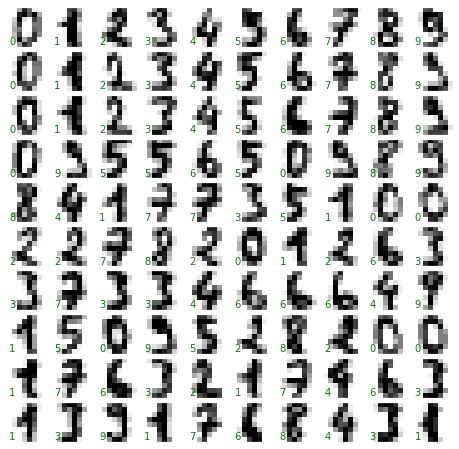

In [4]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(8, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [5]:
X = digits.data

print('Digits dataset, feature matrix\'s type: ', type(X))

# Show feature matrix's size, that is dataset's shape in the context of dataframe.
print('Digits dataset, feature matrix\'s size: ', X.shape, 'samples x features.')

y = digits.target

print('Digits dataset, target vector\'s type: ', type(y))

# Show feature matrix's size, that is dataset's shape in the context of dataframe.
print('Digits dataset, target vector\'s size: ', y.shape, 'samples x features.')

Digits dataset, feature matrix's type:  <class 'numpy.ndarray'>
Digits dataset, feature matrix's size:  (1797, 64) samples x features.
Digits dataset, target vector's type:  <class 'numpy.ndarray'>
Digits dataset, target vector's size:  (1797,) samples x features.


#### Preprocessing Step

In [6]:
iso = Isomap(n_components=2)
iso.fit(X)
data_projected = iso.transform(digits.data)

# Show feature matrix's size, that is dataset's shape in the context of dataframe.
print('Digits dataset, data projected\'s size: ', data_projected.shape, 'samples x features.')

Digits dataset, data projected's size:  (1797, 2) samples x features.


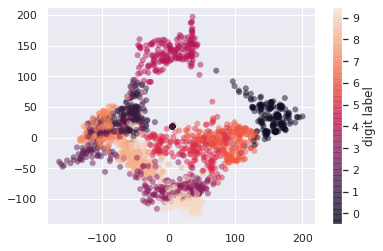

In [7]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
           edgecolor='none', alpha=0.5,
           #cma=plt.cm.get_cmap('plasma', 10))
           )
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

#### Models

In [8]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=random_state)

#### Gaussian naive Bayes

In [9]:
model = GaussianNB()           # 2. Instantiate the model w/ hyperparameters.
model.fit(Xtrain, ytrain)      # 3. Fit the model to data. Notice y is not specified.          

y_model = model.predict(Xtest) # 4. Predict sample's class labels
print('Gaussian naive Bayes accuracy score:', accuracy_score(ytest, y_model))
print(f"Gaussian naive Bayes accuracy score (percentage): {accuracy_score(ytest, y_model)*100:.2f}%")

Gaussian naive Bayes accuracy score: 0.8533333333333334
Gaussian naive Bayes accuracy score (percentage): 85.33%


Text(89.18, 0.5, 'true value')

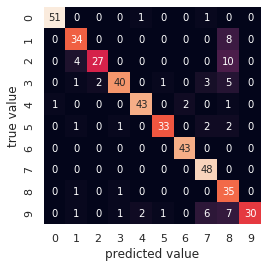

In [12]:
mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

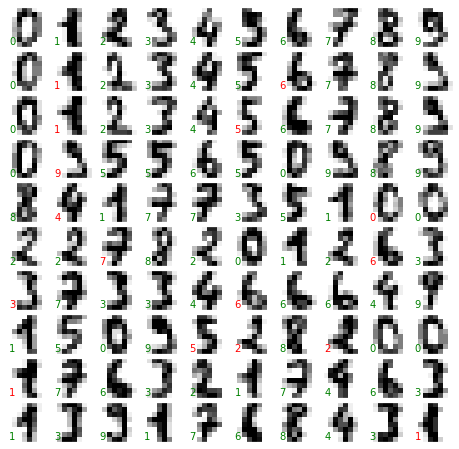

In [13]:
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(8, 8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')